In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import seaborn as sns
from preprocessing import *
from model_simple_rnn import *

In [3]:
use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")

print("Available device: {}".format(device))
print(torch.cuda.get_device_name(0))

Available device: cuda:0
NVIDIA GeForce GTX 1070


Size of vocabulary:	10004


100%|██████████| 1857/1857 [00:01<00:00, 1237.18it/s]


Evaluating model: model/rnn/rnn_model_lstm_v1.pth
F1 score for model: 0.769


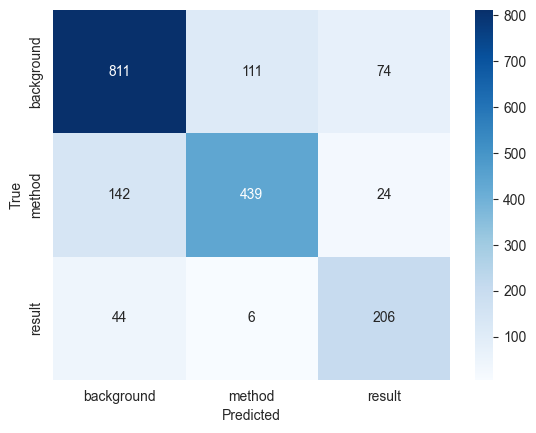

              precision    recall  f1-score   support

  background       0.81      0.81      0.81       996
      method       0.79      0.73      0.76       605
      result       0.68      0.80      0.74       256

    accuracy                           0.78      1857
   macro avg       0.76      0.78      0.77      1857
weighted avg       0.79      0.78      0.78      1857


In [4]:
# [Epoch 6] loss: 15.440, f1 train: 0.891, f1 test: 0.774
model_path = 'model/rnn/rnn_model_lstm_v1.pth'

vocabulary_file_path = 'data/processed/vocabulary.vocab'
processed_test_dataset_file_path = 'data/processed/processed-data-test.txt'

vocabulary = load_vocabulary(vocabulary_file_path)
vocab_size = len(vocabulary)
print('Size of vocabulary:\t{}'.format(vocab_size))

samples_test = load_dataset(processed_test_dataset_file_path, MAX_SEQ_LEN)

X_test  = [ torch.LongTensor(seq) for (seq, _) in samples_test ]
y_test  = [ label for (_, label) in samples_test ]
y_test  = torch.LongTensor(y_test)

dataset_test = BasicDataset(X_test, y_test)
sampler_test = EqualLengthsBatchSampler(BATCH_SIZE, X_test, y_test)
loader_test = DataLoader(dataset_test, batch_sampler=sampler_test, shuffle=False, drop_last=False)

# Model Parameters
eval_model_params = {
    "vocab_size": vocab_size,           # size of vocabulary
    "embed_size": 300,                  # 300 if using pretrained embeddings
    "rnn_cell": "LSTM",                  # RNN, GRU or LSTM

    "rnn_num_layers": 2,                # number of rnn layers
    "rnn_bidirectional": True,          # go over each sequence from both directions

    "rnn_hidden_size": 512,             # size of the RNN hidden state
    "rnn_dropout": 0.5,                 # dropout for rnn layers

    "linear_hidden_sizes": [128, 64],   # list of sizes of hidden linear layers
    "linear_dropout": 0.5,              # dropout for linear layers

    "output_size": 3                    # number of output classes
}
eval_model_params = Dict2Class(eval_model_params)

eval_model = RnnTextClassifier(eval_model_params).to(device)

eval_model.load_state_dict(torch.load(model_path))
eval_model.eval()

y_true, y_pred = evaluate(eval_model, loader_test, device, is_f1=False)
label_list = ['background', 'method', 'result']

f1_eval = f1_score(y_true, y_pred, average='macro')
cm_eval = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=label_list)

print('Evaluating model: {}'.format(model_path))
print('F1 score for model: {:.3f}'.format(f1_eval))

sns.heatmap(cm_eval, annot=True, fmt='d', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(report)

Size of vocabulary:	10004


100%|██████████| 1857/1857 [00:00<00:00, 2036.22it/s]


Evaluating model: model/rnn/rnn_model_v1.pth
F1 score for model: 0.776


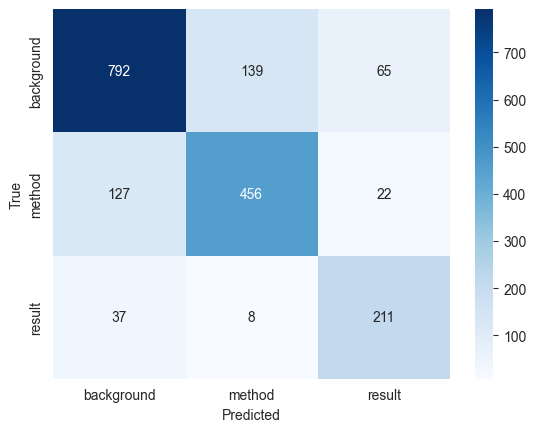

              precision    recall  f1-score   support

  background       0.83      0.80      0.81       996
      method       0.76      0.75      0.75       605
      result       0.71      0.82      0.76       256

    accuracy                           0.79      1857
   macro avg       0.76      0.79      0.78      1857
weighted avg       0.79      0.79      0.79      1857


In [5]:
# [Epoch 37] loss:	22.813, f1 train: 0.878, f1 test: 0.773
model_path = 'model/rnn/rnn_model_v1.pth'

vocabulary_file_path = 'data/processed/vocabulary.vocab'
processed_test_dataset_file_path = 'data/processed/processed-data-test.txt'

vocabulary = load_vocabulary(vocabulary_file_path)
vocab_size = len(vocabulary)
print('Size of vocabulary:\t{}'.format(vocab_size))

samples_test = load_dataset(processed_test_dataset_file_path, MAX_SEQ_LEN)

X_test  = [ torch.LongTensor(seq) for (seq, _) in samples_test ]
y_test  = [ label for (_, label) in samples_test ]
y_test  = torch.LongTensor(y_test)

dataset_test = BasicDataset(X_test, y_test)
sampler_test = EqualLengthsBatchSampler(BATCH_SIZE, X_test, y_test)
loader_test = DataLoader(dataset_test, batch_sampler=sampler_test, shuffle=False, drop_last=False)

# Model Parameters
eval_model_params = {
    "vocab_size": vocab_size,           # size of vocabulary
    "embed_size": 300,                  # 300 if using pretrained embeddings
    "rnn_cell": "GRU",                  # RNN, GRU or LSTM

    "rnn_num_layers": 2,                # number of rnn layers
    "rnn_bidirectional": True,          # go over each sequence from both directions

    "rnn_hidden_size": 512,             # size of the RNN hidden state
    "rnn_dropout": 0.5,                 # dropout for rnn layers

    "linear_hidden_sizes": [128, 64],   # list of sizes of hidden linear layers
    "linear_dropout": 0.5,              # dropout for linear layers

    "output_size": 3                    # number of output classes
}
eval_model_params = Dict2Class(eval_model_params)

eval_model = RnnTextClassifier(eval_model_params).to(device)

eval_model.load_state_dict(torch.load(model_path))
eval_model.eval()

y_true, y_pred = evaluate(eval_model, loader_test, device, is_f1=False)
label_list = ['background', 'method', 'result']

f1_eval = f1_score(y_true, y_pred, average='macro')
cm_eval = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=label_list)

print('Evaluating model: {}'.format(model_path))
print('F1 score for model: {:.3f}'.format(f1_eval))

sns.heatmap(cm_eval, annot=True, fmt='d', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(report)